# Plot the MIOST internal wave database over the southern ocean

Data:

 - https://www.aviso.altimetry.fr/es/data/products/auxiliary-products/internal-tide-miost.html
 
Paper:

 - Clement Ubelmann, Loren Carrere, Chloé Durand, Gérald Dibarboure, Yannice Faugère and Florent Lyard: Simultaneous estimation of Ocean mesoscale and coherent internal tide Sea Surface Height signatures from the global Altimetry record
 
 https://os.copernicus.org/preprints/os-2021-80/os-2021-80.pdf

In [1]:
# !pip install --user cartopy==0.18.0 shapely==1.5.13
# !pip install --user --upgrade cartopy

In [2]:
import xarray as xr
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='medium'

In [4]:
# WA-IMOS location (August 2019)
sites = {
#'NIN100':{'y':-21.84986667,'x':113.9064667},
# 'NWSBAR':{'y':-20.76128333,'x':114.7586167},
# 'NWSROW':{'y':-17.75801667,'x':119.9061},
# 'NWSBRW':{'y':-14.23543333,'x':123.1623833},
# #'NWSLYN':{'y':-9.939416667,'x':130.3490833},
# 'PIL200':{'x': 115.9154, 'y':-19.435333}   ,
# 'KIM200':{'x':121.243217 , 'y':-15.534517} ,  
# 'KIM400':{'x': 121.114967, 'y':-15.22125}   ,
# 'ITFTIS':{'x': 127.5577, 'y':-9.819217}   ,
 'ITF':{'x': 127.3644, 'y':-9.7724},
 'SOTS':{'x': 141.65343, 'y':-46.82621},
 'EAC':{'x': 154.6493, 'y':-27.2083},

#'BB250':{'x':123.34613 , 'y':-13.75897}   ,

}


In [5]:
basedir = '../../../HRET'
ds = xr.open_dataset(r'{}/HRET_v8.1_compressed.nc'.format(basedir))

ds = ds.sel(longitude=slice(20,175),latitude=slice(-75,0))
ds

<xarray.Dataset>
Dimensions:    (longitude: 3101, latitude: 1501)
Coordinates:
  * longitude  (longitude) float64 20.0 20.05 20.1 20.15 ... 174.9 175.0 175.0
  * latitude   (latitude) float64 -75.0 -74.95 -74.9 -74.85 ... -0.1 -0.05 0.0
Data variables:
    M2re       (latitude, longitude) float32 ...
    M2im       (latitude, longitude) float32 ...
    K1re       (latitude, longitude) float32 ...
    K1im       (latitude, longitude) float32 ...
    S2re       (latitude, longitude) float32 ...
    S2im       (latitude, longitude) float32 ...
    O1re       (latitude, longitude) float32 ...
    O1im       (latitude, longitude) float32 ...
    MA2re      (latitude, longitude) float32 ...
    MA2im      (latitude, longitude) float32 ...
    MB2re      (latitude, longitude) float32 ...
    MB2im      (latitude, longitude) float32 ...
Attributes:
    Conventions:              CF-1.7
    history:                  merged txa/j1a/j2a/j3a, txb/j1b/j2b, g1a, and e...
    resolution:               The spatial basis function coefficients are def...
    creator:                  Ed Zaron, ezaron@pdx.edu
    post-processing scripts:  baburu:NASA-Tides/Julia/; this file was written...
    scripts:                  namako:NASA-Tides/Julia/ and coeus:NASA-Tides/J...
    notes:                    This model is an update to the Carrere_HRET_tes...
    results:                  baburu:NASA-Tides/HRET_coeus_results/
    date:                     2018-05-23
    analysis method:          Empirical spatial basis functions are fit to al...
    compression:              compress_hret HRET_v8.1.nc HRET_v8.1_compressed.nc
    creation_time:            2019-03-08T10:45:32Z

In [6]:
# HRET
tidecon='M_2'
amp = np.abs(ds.M2re+1j*ds.M2im)
idx = amp==0
lons, lats, data = ds.longitude.values, ds.latitude.values, amp*100


In [7]:
myds = xr.open_dataset('../../../MIOST/MIOST_OI_1_M2_formatCF.nc')

ds = myds.sel(lon=slice(0,360),lat=slice(-85,40))
lons, lats, data = ds.lon.values, ds.lat.values, ds.amplitude

# ds2 = myds.sel(lon=slice(-180,10),lat=slice(-75,0))
# lons2, lats2, data2 = ds2.lon.values, ds2.lat.values, ds2.amplitude
myds

<xarray.Dataset>
Dimensions:    (lat: 1801, lon: 3600, nv: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon        (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * nv         (nv) int32 0 1
Data variables:
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    crs        int32 ...
    amplitude  (lat, lon) float64 ...
    phase      (lat, lon) float64 ...
Attributes: (12/18)
    cdm_data_type:              Grid
    license:                    http://www.aviso.oceanobs.com/fileadmin/docum...
    product_version:            1.0
    project:                    DUACS
    title:                      MIOST-IT baroclinic tide elevations
    summary:                    Global internal tide solution based on a simu...
    ...                         ...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Conventions:                CF-1.6
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.1
    geospatial_lon_resolution:  0.1

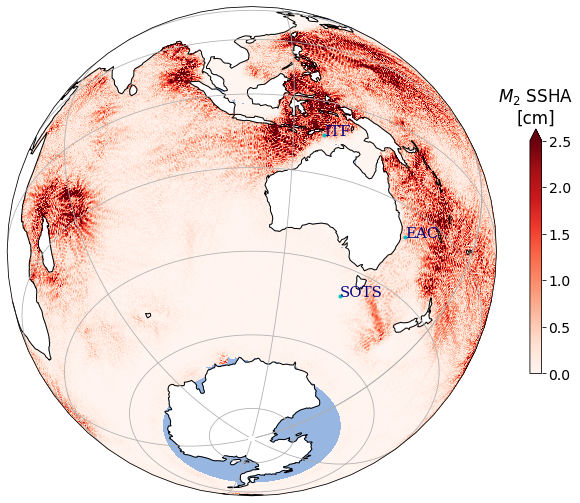

In [23]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 1, 1, 
            projection=ccrs.Orthographic(central_longitude=110, central_latitude=-40.))


# ax1.contourf(lons, lats, data, np.arange(0.,2.5,0.25) , extend='max',
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')
C = ax1.pcolormesh(lons, lats, data, vmin=0, vmax=2.5,
            transform=ccrs.PlateCarree(),
            cmap='Reds')

# ax1.pcolormesh(lons2, lats2, data2, vmin=0, vmax=2.5,
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')

# ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
# ax1.set_global()
ax1.gridlines(linestyles=':')


font = {'family': 'serif',
        'color':  'navy',
        'weight': 'normal',
        'size': 15,
        }

for ss in sites.keys():
    plt.plot(sites[ss]['x'],sites[ss]['y'],'c.', transform=ccrs.PlateCarree())

    plt.text(sites[ss]['x'],sites[ss]['y'],ss, transform=ccrs.PlateCarree(), fontdict=font)

cax=plt.colorbar(C, extend='max', shrink=0.5)
cax.ax.set_title('$M_2$ SSHA\n[cm]')

plt.savefig('../FIGURES/MIOST_M2_SouthernOcean_Eastern.png', dpi=150)

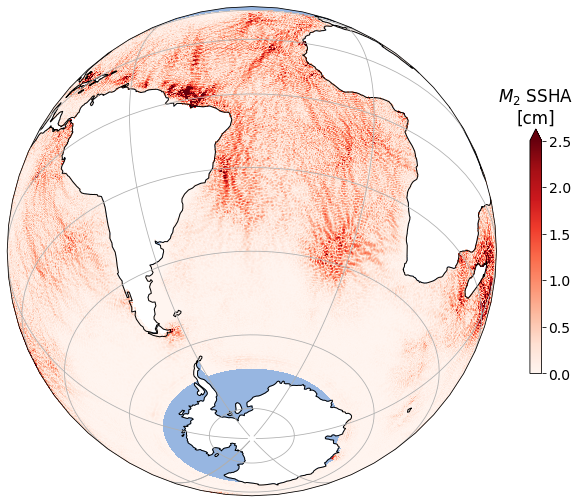

In [26]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 1, 1, 
            projection=ccrs.Orthographic(central_longitude=330, central_latitude=-40.))


# ax1.contourf(lons, lats, data, np.arange(0.,2.5,0.25) , extend='max',
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')
C = ax1.pcolormesh(lons, lats, data, vmin=0, vmax=2.5,
            transform=ccrs.PlateCarree(),
            cmap='Reds')

# ax1.pcolormesh(lons2, lats2, data2, vmin=0, vmax=2.5,
#             transform=ccrs.PlateCarree(),
#             cmap='Reds')

# ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
# ax1.set_global()
ax1.gridlines(linestyles=':')


font = {'family': 'serif',
        'color':  'navy',
        'weight': 'normal',
        'size': 15,
        }

# for ss in sites.keys():
#     plt.plot(sites[ss]['x'],sites[ss]['y'],'c.', transform=ccrs.PlateCarree())

#     plt.text(sites[ss]['x'],sites[ss]['y'],ss, transform=ccrs.PlateCarree(), fontdict=font)

cax=plt.colorbar(C, extend='max', shrink=0.5)
cax.ax.set_title('$M_2$ SSHA\n[cm]')

plt.savefig('../FIGURES/MIOST_M2_SouthernOcean_Western.png', dpi=150)